In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

In [38]:
df = pd.read_csv('./../data/BANKS AD DATA.csv')
df.head()

,Date,Post link,View,Post Hour,Bank,Time of day
0,26/9/2023,https://t.me/tikvahethiopia/81734,239800,10:18,BOA,night
1,19/9/2023,https://t.me/tikvahethiopia/81606,258400,6:53,BOA,night
2,15/9/2023,https://t.me/tikvahethiopia/81502,269400,3:56,BOA,evening
3,8/9/2023,https://t.me/tikvahethiopia/81338,219400,10:50,BOA,afternoon
4,5/9/2023,https://t.me/tikvahethiopia/81252,255900,1:19,BOA,afternoon


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         115 non-null    object
 1   Post link    115 non-null    object
 2   View         115 non-null    int64 
 3   Post Hour    115 non-null    object
 4   Bank         115 non-null    object
 5   Time of day  21 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


In [40]:
# since the date doesn't match doing manually
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x) if '/' in x else x)


/tmp/ipykernel_16607/1266037980.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x) if '/' in x else x)


In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Post link,View,Post Hour,Bank,Time of day
0,2023-09-26 00:00:00+00:00,https://t.me/tikvahethiopia/81734,239800,10:18,BOA,night
1,2023-09-19 00:00:00+00:00,https://t.me/tikvahethiopia/81606,258400,6:53,BOA,night
2,2023-09-15 00:00:00+00:00,https://t.me/tikvahethiopia/81502,269400,3:56,BOA,evening
3,2023-08-09 00:00:00+00:00,https://t.me/tikvahethiopia/81338,219400,10:50,BOA,afternoon
4,2023-05-09 00:00:00+00:00,https://t.me/tikvahethiopia/81252,255900,1:19,BOA,afternoon
...,...,...,...,...,...,...
110,2024-05-14 07:49:21+00:00,https://t.me/tikvahethiopia/87636,251011,07:49,banksinethiopia,NaN
111,2024-05-14 07:49:21+00:00,https://t.me/tikvahethiopia/87636,251011,07:49,BankofAbyssina,NaN
112,2024-05-17 08:08:16+00:00,https://t.me/tikvahethiopia/87693,242611,08:08,bankinginethiopia,NaN
113,2024-05-17 08:08:16+00:00,https://t.me/tikvahethiopia/87693,242611,08:08,banksinethiopia,NaN


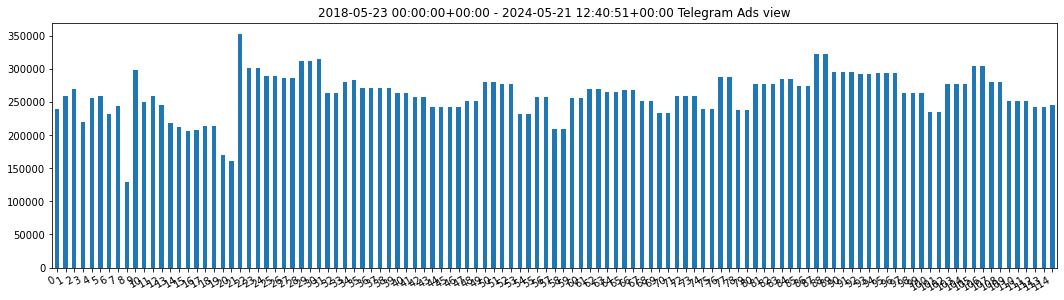

In [45]:
min = df['Date'].min()
max = df['Date'].max()
fig, ax = plt.subplots()

title=f'{min} - {max} Telegram Ads view'
df['View'].plot(kind='bar', title=title, figsize=(18,5))
fig.autofmt_xdate() 
plt.show()

In [46]:
_range = df['View'].max() - df['View'].min()
_range

222667

In [47]:
mean = df['View'].mean()
mean

261713.69565217392

In [51]:
maxview = df['View'].max()
maxview

352067

In [48]:
df.set_index('Date', inplace=True)

<AxesSubplot:title={'center':'Time series view trend'}, xlabel='Date', ylabel='Views'>

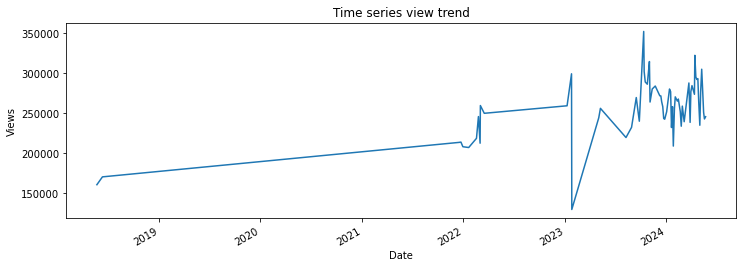

In [49]:
df['View'].plot(title='Time series view trend', figsize=(12,4), ylabel='Views')

In [53]:
newdf = df.drop(columns=['Time of day'], axis=1)
newdf.groupby('Bank').count()

,Post link,View,Post Hour
Bank,,,
Abyssinia_Bank,1,1,1
Apollodigitalbank,20,20,20
Apollodigitalproduct,20,20,20
BOA,21,21,21
BankofAbyssina,5,5,5
BoAATM,2,2,2
bankinginethiopia,21,21,21
banksinethiopia,25,25,25
